# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

In [3]:
monthly_avg = df['count'].resample('MS').mean()

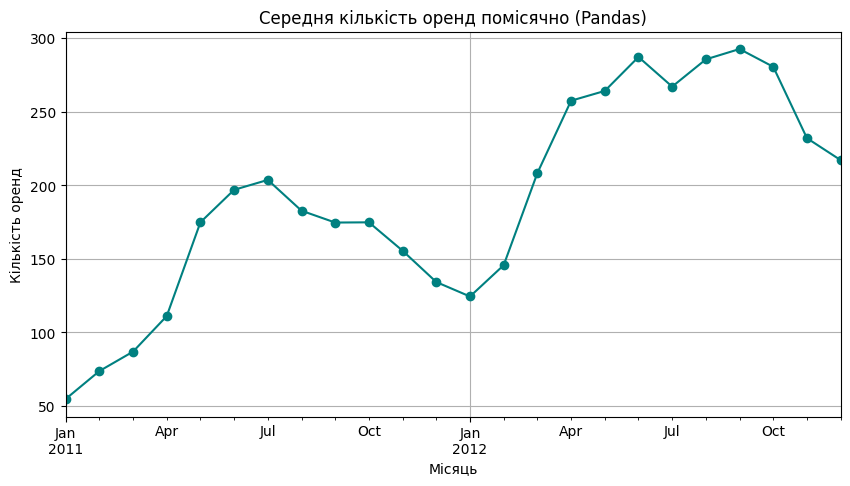

In [4]:
monthly_avg.plot(
    marker='o',
    color='teal',
    title='Середня кількість оренд помісячно (Pandas)',
    ylabel='Кількість оренд',
    xlabel='Місяць',
    figsize=(10, 5)
)
plt.grid(True)
plt.show()

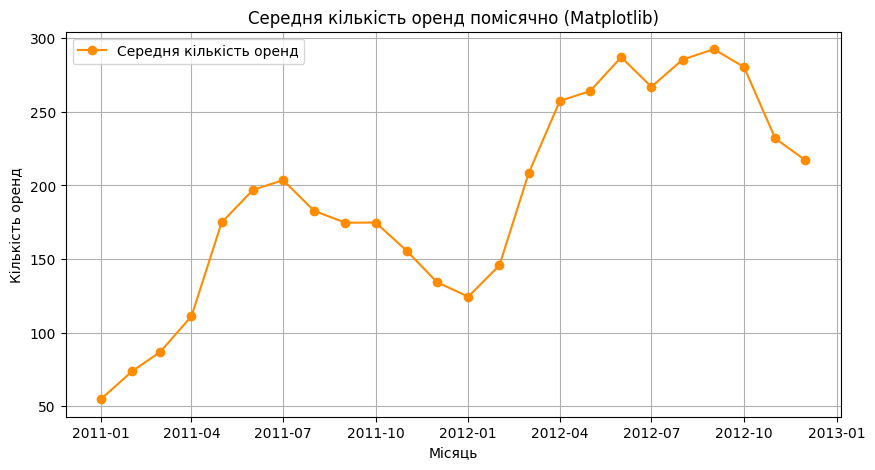

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='darkorange',
    label='Середня кількість оренд'
)
plt.title('Середня кількість оренд помісячно (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.legend()
plt.show()

Обидва графіки після деяких уточнень в коді виглядають ідентичними.  
Pandas більш зручний, тому що потрібно мало писати коду, в Matplotlib потрібно більше налаштувань. Також потрібно бути уважним з датами, оскільки на графіках Matplotlib дата і маркери можуть вказуватися наступним місяцем, що викривляє дані. (нижче графік для порівняння де видно, що дані за 12.2012 відображаються як 01.2013) 
З точки зору простоти та легкості написання коду то більш зручніший Pandas мінімальне ручне втручання, а якщо з точки зору гнучкості налаштування то звичайно Matplotlib більш зручніший для використання. Але потрібно мати на увазі та перевіряти коректність відображення данних по періодам,  та прописувати всі значення осі і показників.


In [6]:
monthly_avg = df['count'].resample('ME').mean()

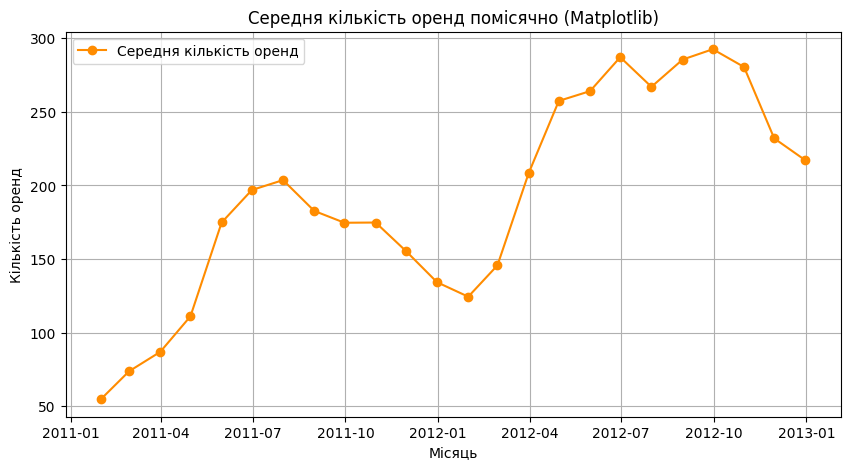

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_avg.index,
    monthly_avg.values,
    marker='o',
    color='darkorange',
    label='Середня кількість оренд'
)
plt.title('Середня кількість оренд помісячно (Matplotlib)')
plt.xlabel('Місяць')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.legend()
plt.show()

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [8]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

In [9]:
day_labels = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд']

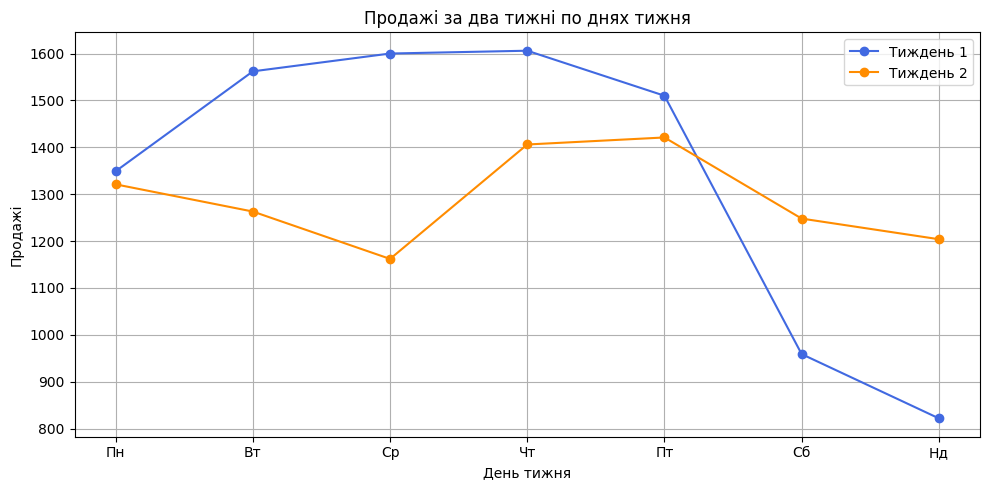

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(days, sales_week1, marker='o', label='Тиждень 1', color='royalblue')
plt.plot(days, sales_week2, marker='o', label='Тиждень 2', color='darkorange')

plt.title('Продажі за два тижні по днях тижня')
plt.xlabel('День тижня')
plt.ylabel('Продажі')
plt.xticks(days, day_labels)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше? 
Аналізуючи графік, більш стабільним є тиждень 2. Більш рівномірні продажі,  без дуже різких всплесків та спадів.
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.
Можна розрахувати стандартне віхилення, за допомогою якого можемо побачити наскільки дані відхиляються від середньго значення. (нижче приведено розрахунок). В 2тижні стандартне відхилення менше, що означає меншу варіативність данних, а отже більш стабільні продажі.


In [11]:
std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f"Стандартне відхилення тиждень 1: {std_week1:.2f}")
print(f"Стандартне відхилення тиждень 2: {std_week2:.2f}")

Стандартне відхилення тиждень 1: 300.00
Стандартне відхилення тиждень 2: 90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [12]:
# 1. Середня температура помісячно
monthly_temp = df.groupby('month')['temp'].mean()

# 2. Середня кількість оренд за сезонами (текстові назви)
season_names = {1: 'Зима', 2: 'Весна', 3: 'Літо', 4: 'Осінь'}
season_order = ['Зима', 'Весна', 'Літо', 'Осінь']
df['season_name'] = pd.Categorical(df['season'].map(season_names), categories=season_order, ordered=True)
season_rentals = df.groupby('season_name', observed=False)['count'].mean().sort_index()


# 3. Дані вологості
humidity_data = df['humidity']

# 4. Дані для scatter-графіку
temp = df['temp']
count = df['count']



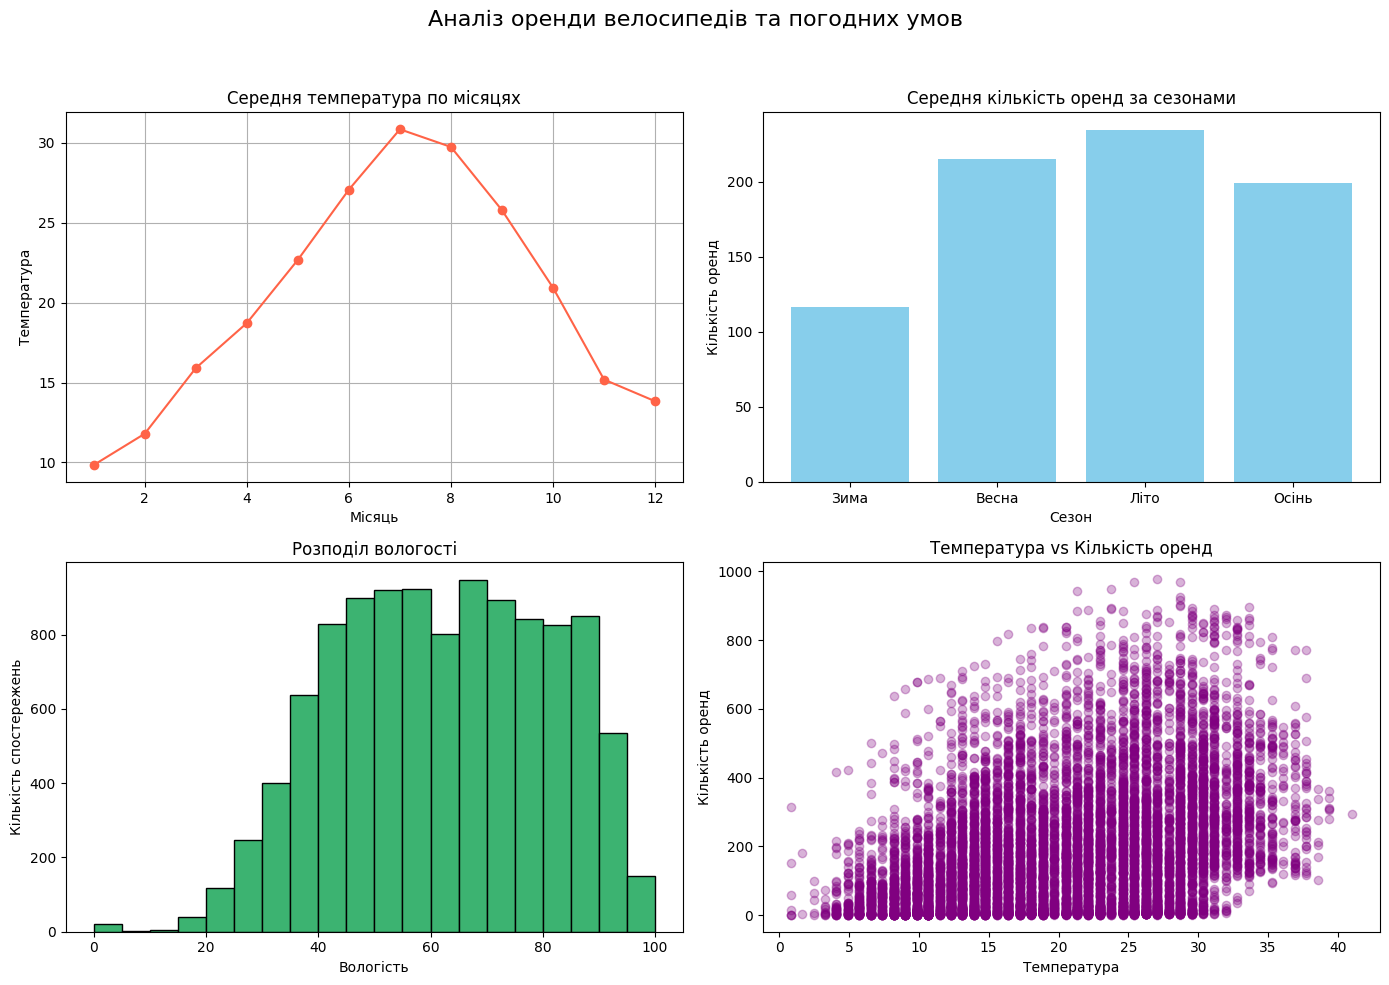

In [13]:
plt.figure(figsize=(14, 10))
plt.suptitle('Аналіз оренди велосипедів та погодних умов', fontsize=16)

# 1. Лінійний графік середньої температури помісячно
plt.subplot(2, 2, 1)
plt.plot(monthly_temp.index, monthly_temp.values, marker='o', color='tomato')
plt.title('Середня температура по місяцях')
plt.xlabel('Місяць')
plt.ylabel('Температура')
plt.grid(True)

# 2. Стовпчикова діаграма кількості оренд за сезонами
plt.subplot(2, 2, 2)
plt.bar(season_rentals.index, season_rentals.values, color='skyblue')
plt.title('Середня кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(humidity_data, bins=20, color='mediumseagreen', edgecolor='black')
plt.title('Розподіл вологості')
plt.xlabel('Вологість')
plt.ylabel('Кількість спостережень')

# 4. Scatter plot температура vs оренди
plt.subplot(2, 2, 4)
plt.scatter(temp, count, alpha=0.3, color='purple')
plt.title('Температура vs Кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

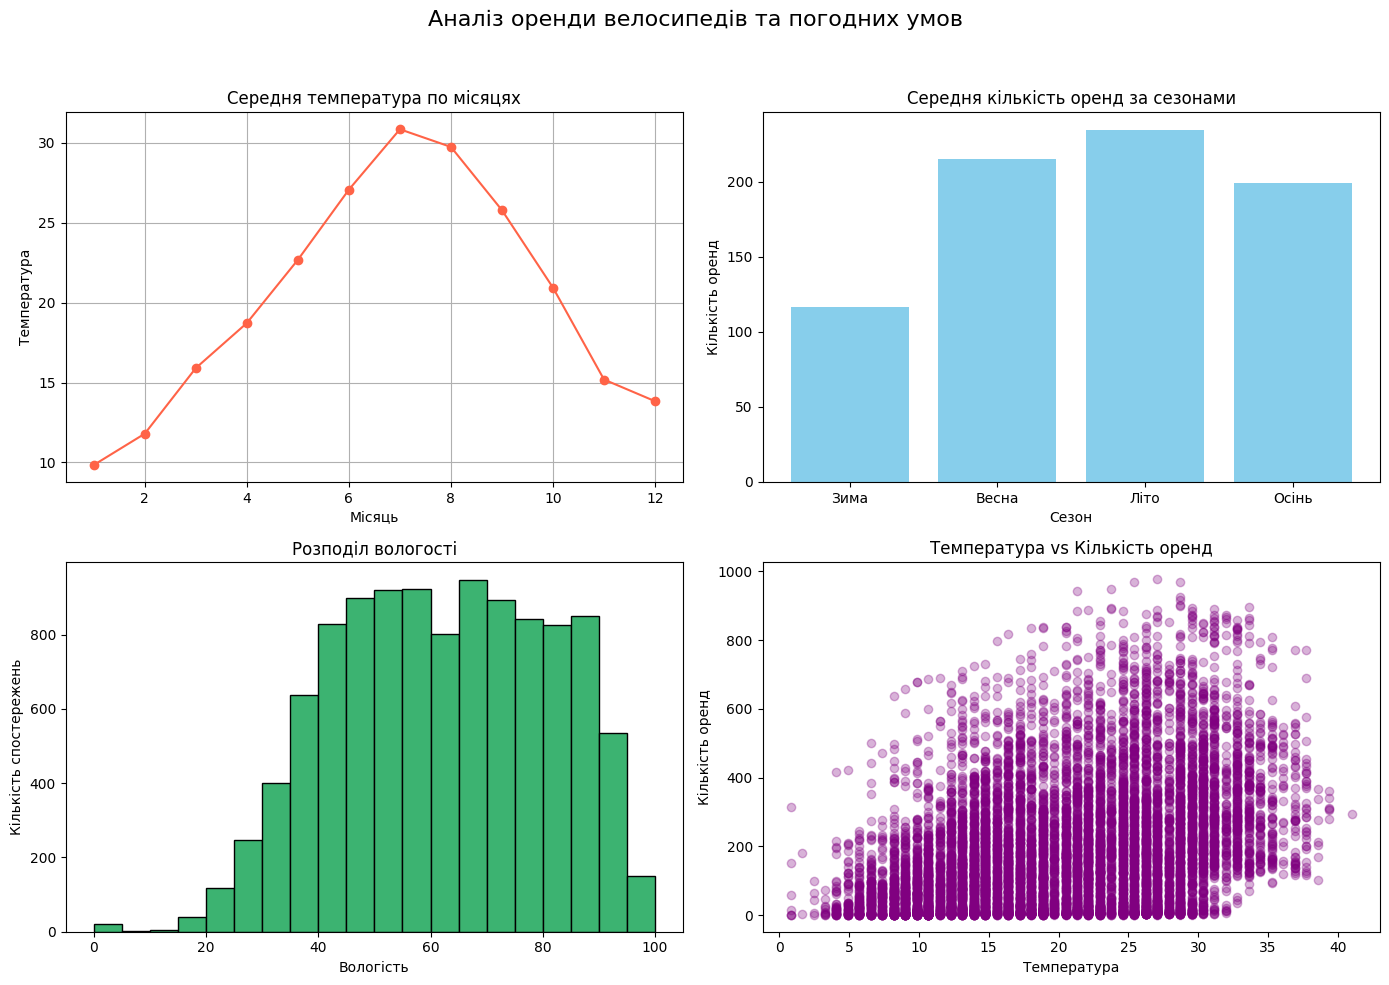

In [14]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Аналіз оренди велосипедів та погодних умов', fontsize=16)

# 1. Лінійний графік середньої температури помісячно
axs[0, 0].plot(monthly_temp.index, monthly_temp.values, marker='o', color='tomato')
axs[0, 0].set_title('Середня температура по місяцях')
axs[0, 0].set_xlabel('Місяць')
axs[0, 0].set_ylabel('Температура')
axs[0, 0].grid(True)

# 2. Стовпчикова діаграма кількості оренд за сезонами
axs[0, 1].bar(season_rentals.index, season_rentals.values, color='skyblue')
axs[0, 1].set_title('Середня кількість оренд за сезонами')
axs[0, 1].set_xlabel('Сезон')
axs[0, 1].set_ylabel('Кількість оренд')

# 3. Гістограма вологості
axs[1, 0].hist(humidity_data, bins=20, color='mediumseagreen', edgecolor='black')
axs[1, 0].set_title('Розподіл вологості')
axs[1, 0].set_xlabel('Вологість')
axs[1, 0].set_ylabel('Кількість спостережень')

# 4. Scatter plot температура vs оренди
axs[1, 1].scatter(temp, count, alpha=0.3, color='purple')
axs[1, 1].set_title('Температура vs Кількість оренд')
axs[1, 1].set_xlabel('Температура')
axs[1, 1].set_ylabel('Кількість оренд')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

plt.subplot — швидкий спосіб створити окремий графік у певній позиції. Складність в тому, що маємо працювати з кожним графіком окремо і вказувати plt

plt.subplots — створюється одразу всі графіки і повертає об’єкти через масив Axes, з якими  працюємо напряму, що дає більше контролю і зручності

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

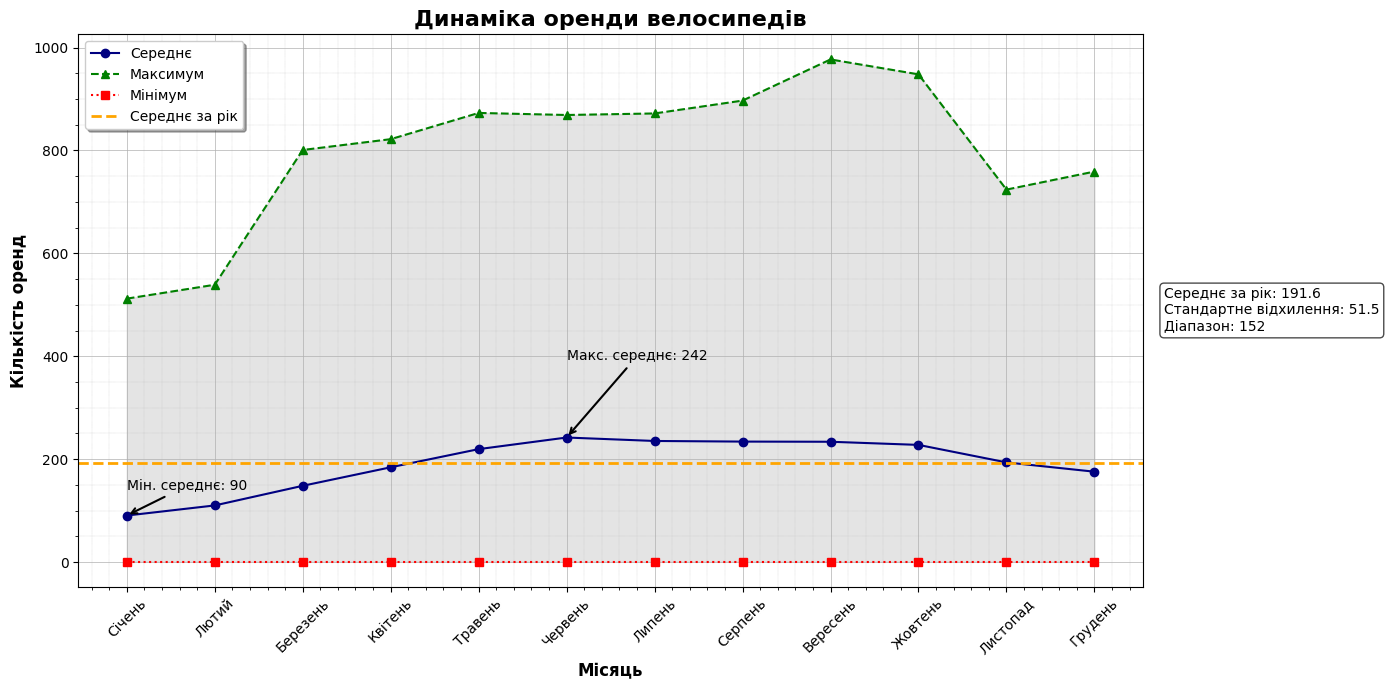

In [32]:
df_cleaned = df.copy()

df_cleaned = df_cleaned[df_cleaned['count'] > 0]
df_cleaned = df_cleaned[df_cleaned.index.day < 20]
monthly_stats = df_cleaned.groupby('month')['count'].agg(['mean', 'max', 'min'])

# Загальне середнє (по очищеним даним) місяці з мін та макс середніх значень
overall_mean = df_cleaned['count'].mean()
max_month = monthly_stats['mean'].idxmax()
min_month = monthly_stats['mean'].idxmin()
std_dev = monthly_stats['mean'].std()
data_range = monthly_stats['mean'].max() - monthly_stats['mean'].min()

plt.figure(figsize=(14, 7))
plt.title('Динаміка оренди велосипедів', fontsize=16, fontweight='bold')

plt.plot(monthly_stats.index, monthly_stats['mean'], label='Середнє', linestyle='-', marker='o', color='navy')
plt.plot(monthly_stats.index, monthly_stats['max'], label='Максимум', linestyle='--', marker='^', color='green')
plt.plot(monthly_stats.index, monthly_stats['min'], label='Мінімум', linestyle=':', marker='s', color='red')

plt.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], color='lightgrey', alpha=0.6)

plt.axhline(overall_mean, color='orange', linestyle='--', linewidth=2, label='Середнє за рік')

plt.annotate(f'Макс. середнє: {monthly_stats.loc[max_month, "mean"]:.0f}',
             xy=(max_month, monthly_stats.loc[max_month, 'mean']),
             xytext=(max_month, monthly_stats.loc[max_month, 'mean'] + 150),
             arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=10)


plt.annotate(f'Мін. середнє: {monthly_stats.loc[min_month, "mean"]:.0f}', 
             xy=(min_month, monthly_stats.loc[min_month, 'mean']),
             xytext=(min_month, monthly_stats['mean'].min() + 50),
             arrowprops=dict(arrowstyle='->', lw=1.5), fontsize=10)

plt.grid(True, which='major', linestyle='-', linewidth=0.5)
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.3)

plt.xlabel('Місяць', fontsize=12, fontweight='bold')
plt.ylabel('Кількість оренд', fontsize=12, fontweight='bold')

plt.legend(loc='upper left', shadow=True, fontsize=10)

textstr = '\n'.join((
    f"Середнє за рік: {overall_mean:.1f}",
    f"Стандартне відхилення: {std_dev:.1f}",
    f"Діапазон: {data_range:.0f}"
))
month_names = ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень',
               'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень']
plt.xticks(ticks=range(1, 13), labels=month_names, rotation=45)
plt.text(1.02, 0.5, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='center', bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

plt.tight_layout()
plt.show()

1. Яка перевага додавання анотацій на графік?
 Анотації дозволяють швидко звернути увагу на ключові точки графіка наприклад, пік або мінімум, що  підвищує інформативність та зручність візуалізації.
2. Для чого використовується fill_between()?
fill_between() допомагає візуалізувати діапазон між двома кривими. В нашому випадку між мінімальним і максимальним значенням. Це дає змогу краще побачити варіативність даних.
3. Як текстовий блок допомагає в інтерпретації даних?
Блок із ключовою статистикою дозволяє миттєво побачити загальні висновки. 
Така вставка робить графік схожим на звіт або презентацію, що дуже зручно для прийняття оперативних рішень